In [1]:
# Helper Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
import statsmodels.api as sm


In [2]:
# Check for the dataset in the directory

os.listdir()

['.ipynb_checkpoints',
 'Churn Project - Clean and Histograms (1).ipynb',
 'Churn Project - Clean and Histograms.ipynb',
 'Churn Project - Histograms (1).ipynb',
 'Churn Project - Histograms For Churned Customers Only.ipynb',
 'Data Cleaning and Initial Exploration.ipynb',
 'DataSciencePractice.ipynb',
 'project.ipynb',
 'ProjectAttempt.ipynb',
 'ProjectPractice.ipynb',
 'PythonProject',
 'Support Vector Classifier.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled10.ipynb',
 'Untitled11.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb',
 'Untitled6.ipynb',
 'Untitled7.ipynb',
 'Untitled8.ipynb',
 'WA_Fn-UseC_-Telco-Customer-Churn - Shortcut.lnk',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [8]:
churnDataFrame = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv',skipinitialspace=True)
churnDataFrame.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churnDataFrame.shape

(7043, 21)

TypeError: parser_f() got an unexpected keyword argument 'skipinitalspace'

In [4]:
#check for attributes with missing values
churnDataFrame.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [31]:
#example record with missing value 
churnDataFrame.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [32]:
#impute 0's for the nulls
churnDataFrame['TotalCharges'] = churnDataFrame['TotalCharges'].fillna(value=0)

In [33]:
#validation for imputation 
churnDataFrame.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                0
Churn                                      No
Name: 488, dtype: object

In [34]:
# Column conversion to boolean datatype
# No dimensional increase if we drop the 'no' column generated

Partner = pd.get_dummies(churnDataFrame.Partner,prefix='Partner', drop_first = False)

Gender = pd.get_dummies(churnDataFrame.gender,prefix='Gender', drop_first = False)

Dependents = pd.get_dummies(churnDataFrame.Dependents,prefix='Dependents', drop_first = False)

PhoneService = pd.get_dummies(churnDataFrame.PhoneService,prefix='PhoneServices', drop_first = False)

PaperlessBilling = pd.get_dummies(churnDataFrame.PaperlessBilling,prefix='PaperlessBilling', drop_first = False)

Churn = pd.get_dummies(churnDataFrame.Churn,prefix='Churn', drop_first = False)

SeniorCitizen = pd.get_dummies(churnDataFrame.SeniorCitizen,prefix='SeniorCitizen', drop_first = False)

print(Partner)
print(Gender)
print(Dependents)
print(PhoneService)
print(PaperlessBilling)
print(Churn)
print(SeniorCitizen)

      Partner_No  Partner_Yes
0              0            1
1              1            0
2              1            0
3              1            0
4              1            0
...          ...          ...
7038           0            1
7039           0            1
7040           0            1
7041           0            1
7042           1            0

[7043 rows x 2 columns]
      Gender_Female  Gender_Male
0                 1            0
1                 0            1
2                 0            1
3                 0            1
4                 1            0
...             ...          ...
7038              0            1
7039              1            0
7040              1            0
7041              0            1
7042              0            1

[7043 rows x 2 columns]
      Dependents_No  Dependents_Yes
0                 1               0
1                 1               0
2                 1               0
3                 1               0
4             

In [13]:
# Dimensional increase of 2; Consider dropping 'No'

MultipleLines = pd.get_dummies(churnDataFrame.MultipleLines, prefix = 'MultipleLines', drop_first= False)

InternetService = pd.get_dummies(churnDataFrame.InternetService, prefix = 'InternetService', drop_first= False)

OnlineSecurity = pd.get_dummies(churnDataFrame.OnlineSecurity, prefix = 'OnlineSecurity', drop_first= False)

OnlineBackup = pd.get_dummies(churnDataFrame.OnlineBackup, prefix = 'OnlineBackup', drop_first= False)

DeviceProtection = pd.get_dummies(churnDataFrame.DeviceProtection, prefix = 'DeviceProtection', drop_first= False)

TechSupport = pd.get_dummies(churnDataFrame.TechSupport, prefix = 'TechSupport', drop_first= False)

StreamingTV = pd.get_dummies(churnDataFrame.StreamingTV, prefix = 'StreamingTV', drop_first= False)

StreamingMovies = pd.get_dummies(churnDataFrame.StreamingMovies, prefix = 'StreamingMovies', drop_first= False)

# Candidate for 0, 1, and 2 encoding
Contract = pd.get_dummies(churnDataFrame.Contract, prefix = 'Contract', drop_first= False)

PaymentMethod = pd.get_dummies(churnDataFrame.PaymentMethod, prefix = 'PaymentMethod', drop_first= False)

print(MultipleLines)
print(InternetService)
print(OnlineSecurity)
print(OnlineBackup)
print(DeviceProtection)
print(TechSupport)
print(StreamingTV)
print(StreamingMovies)
print(Contract)
print(PaymentMethod)


      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes
0                    0                               1                  0
1                    1                               0                  0
2                    1                               0                  0
3                    0                               1                  0
4                    1                               0                  0
...                ...                             ...                ...
7038                 0                               0                  1
7039                 0                               0                  1
7040                 0                               1                  0
7041                 0                               0                  1
7042                 1                               0                  0

[7043 rows x 3 columns]
      InternetService_DSL  InternetService_Fiber optic  InternetService_No
0           

In [14]:

# customerID - Key index; consider refactoring with index: customerID dictionary
# tenure - Rational Integer; Keep as is. Higher is more meaningful
# monthlyCharges - Rational Decimal; Keep as is. Higher is more meaingful
# totalCharges - Rational Decimal; Keep as is. Higher is more meaingful

# Upon agreement, we'll refactor the dataset to use these new variables

# Create histograms for these categories:
# Total charges, monthly charges, tenure

# Catherine - data prep replace nulls with 0s to be done by Sat
#             check data types, floats should be floats, not text, etc
#             will use this new clean file for the model

# Jennipher - Create hists, scatterplots (?) to be done by Sat
#             for categories mentioned, comment on distribution of features

# David -     Can do log transformations as necessary

In [15]:
# List of column names

list(churnDataFrame.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [16]:

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

churnDataFrame.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0.5, 0, 'Charges')

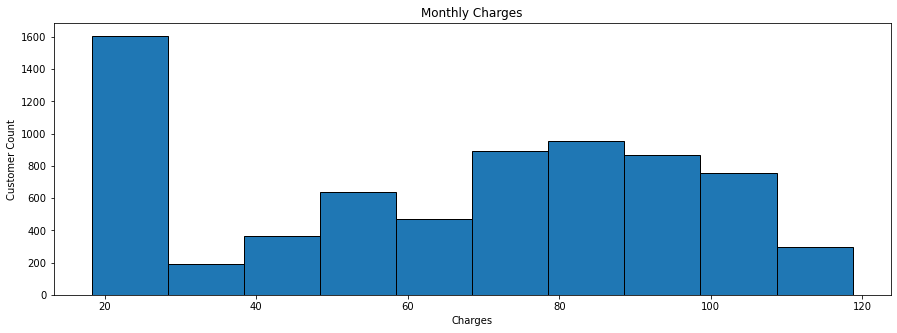

In [17]:
churnDataFrame.hist(column = 'MonthlyCharges', grid = False, edgecolor = 'k', figsize = (15,5))
plt.title('Monthly Charges')
plt.ylabel('Customer Count')
plt.xlabel('Charges')

Text(0.5, 0, 'Months with Telco')

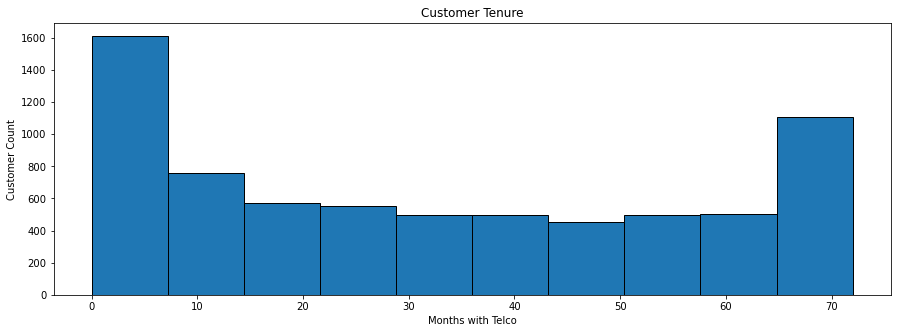

In [18]:
churnDataFrame.hist(column = 'tenure', grid = False, edgecolor = 'k', figsize = (15,5))
plt.title('Customer Tenure')
plt.ylabel('Customer Count')
plt.xlabel('Months with Telco')

Text(0.5, 0, 'Total Charge to Customer')

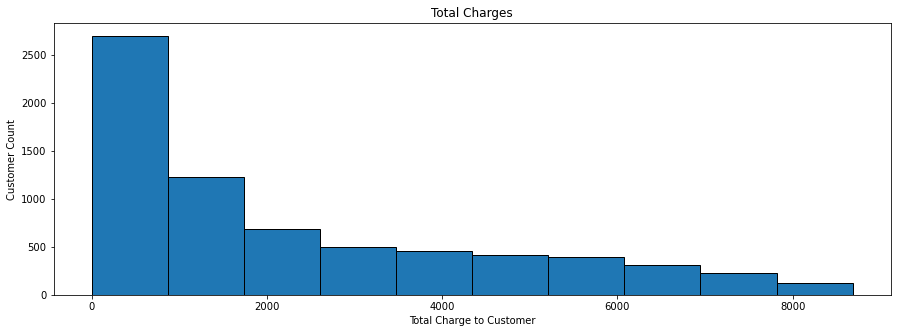

In [19]:
churnDataFrame.hist(column = 'TotalCharges', grid = False, edgecolor = 'k', figsize = (15,5))
plt.title('Total Charges')
plt.ylabel('Customer Count')
plt.xlabel('Total Charge to Customer')

NameError: name 'x1' is not defined

In [45]:
y=churnDataFrame['Churn']
x1=churnDataFrame[['Total Charges',''

KeyError: 'Total Charges'

In [43]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

TypeError: cannot perform reduce with flexible type